# Primer notebook para transformar los datos de capi_chat

In [1]:
# en este notebook voy a ver como son mis datos, visualizar y ver que puedo hacer.

In [46]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import re
import csv

import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize.toktok import ToktokTokenizer

!pip install spacy
!python -m spacy download es_core_news_sm
!pip install --upgrade spacy
import spacy

# Cargar el modelo de lenguaje en español
nlp = spacy.load("es_core_news_sm")



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 25.9 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [47]:
#para la ortografia
import enchant

In [38]:
# Empezamos llamando a los datos.

In [39]:
# Ruta al archivo de texto que deseas convertir
archivo_txt = '../data/capi_chat.txt'

# Ruta al archivo CSV de salida
archivo_csv = '../data/capi_chat.csv'

# Patrón de expresión regular para buscar la fecha, hora, persona y mensaje
patron = r'\[(.*?)\] (.*?): (.*)'

# Lee el archivo de texto y escribe los datos en un archivo CSV
with open(archivo_txt, 'r') as txt_file, open(archivo_csv, 'w', newline='') as csv_file:
    # Crea un objeto de escritura de CSV
    writer = csv.writer(csv_file)
    # Escribe el encabezado del CSV
    writer.writerow(["Fecha", "Hora", "Persona", "Mensaje"])
    
    # Procesa cada línea del archivo de texto
    for linea in txt_file:
        # Busca coincidencias con el patrón de expresión regular
        match = re.match(patron, linea)
        
        # Si hay una coincidencia, extrae la información
        if match:
            fecha_hora, persona, mensaje = match.groups()
            fecha, hora = fecha_hora.split()
            
            # Escribe los datos en el archivo CSV
            writer.writerow([fecha, hora, persona, mensaje])

print("El archivo TXT se ha convertido exitosamente a CSV.")


El archivo TXT se ha convertido exitosamente a CSV.


In [40]:
df = pd.read_csv("../data/capi_chat.csv")


In [41]:
df.head(10)

,Fecha,Hora,Persona,Mensaje
0,"30/11/23,",19:12:50,Capibaras Ironhack,‎Los mensajes y las llamadas están cifrados de...
1,"30/11/23,",19:12:50,Alana Ironhack,‎Alana Ironhack creó el grupo “Capibaras Ironh...
2,"30/11/23,",19:12:50,Capibaras Ironhack,‎Alana Ironhack te añadió.
3,"30/11/23,",19:12:56,Alana Ironhack,Hola
4,"30/11/23,",19:13:12,Alana Ironhack,Les paso las fotos de ayer prepárense xq es un...
5,"30/11/23,",20:22:19,~ Teresa,Es un bombardeo que nos ahorra prácticamente u...
6,"30/11/23,",20:22:38,Alana Ironhack,Jajaja
7,"30/11/23,",20:32:18,Sil🐨,Muchas gracias!
8,"1/12/23,",17:10:16,~ Teresa,Fan del icono del grupo
9,"1/12/23,",17:11:26,~ Teresa,Entregue el lab sin el último ejercicio del fa...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    1774 non-null   object
 1   Hora     1774 non-null   object
 2   Persona  1774 non-null   object
 3   Mensaje  1774 non-null   object
dtypes: object(4)
memory usage: 55.6+ KB


In [11]:
df.shape

(1774, 4)

In [12]:
df.count()      # Used to count the number of rows

Fecha      1774
Hora       1774
Persona    1774
Mensaje    1774
dtype: int64

In [32]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 4)


# LIMPIEZA 

In [ ]:
#He probado con los datos que ya tengo a hacer un analisis y el resultado es que todo
#da neutro, voy a probar a hacer una limpieza mas profunda.

In [25]:
#from contracciones import CONTRACTION_MAP 

In [48]:
mapeo_abreviaturas = {
"xq": "porque",
"Holiiii": "Hola",
"sticker omitido": "imagen",
"imagen omitida": "imagen",
"q": "que",
"X": "por",
"x": "por",
"esq": "es que",
"GIF omitido": "GIF",
"Valee": "vale",
"perfe": "perfecto",
"Siiii": "Si",
"siii": "Si",
"Ayyy":"Ay",
"proque": "porque",
"nose": "no se",
"sii": "si",
"tmbn": "tambien",
"lab": "laboratorio",
"labs": "labboratotios",
"lst": "lista",
"reu": "reunion",
"michi": "gato",
"jaajaaj": "jajajajaja",
"xd": "risa",
"capiiis": "capi",
"smpr": "siempre",
"Noup": "No",
"okii": "vale",
"year": "año",
"string": "letras",
"colorinchis": "colores",
"pull request": "subir",
"LOL": "risa a carcajadas",
"Wsp": "WhatsApp",
"Wasap": "WhatsApp",
"wa": "WhatsApp",
"Guasap": "WhatsApp",
"Pq": "porque",
"Xq": "porque",
"q": "que",
"Dnd": "donde",
"K": "que",
"T": "te",
"+/-": "mas o menos",
"Nd": "nada",
"Vdd": "verdad",
"Ntp": "no te preocupes",
"Tqm": "Te quiero mucho",
"Tq": "Te quiero",
"Tmb": "tambien",
"Dps": "despues",
"Xfa": "por favor",
"Dd": "donde",
"Oki": "vale",
"Ok": "vale",
"OK": "vale",
"Tkt": "tranquilo",
"Tqg": "te quiero un monton",
"Bss": "besos",
"Tmbn": "tambien",
"Fvr": "favor",
"Msj": "mensaje",
"LMAO": "risa",
"BRB": "Vuelvo enseguida",
"IDK": "no se",
"idk": "no se",
"ASAP": "tan pronto como sea posible",
"OMG": "Oh Dios mio",
"BFF": "Mejores amigos para siempre",
"Okey": "vale",
}

In [49]:
# Función para corregir abreviaturas en un texto
def corregir_abreviaturas(texto, mapeo_abreviaturas):
    palabras = texto.split()
    texto_corregido = []
    for palabra in palabras:
        palabra_corregida = mapeo_abreviaturas.get(palabra.lower(), palabra)
        texto_corregido.append(palabra_corregida)
    return ' '.join(texto_corregido)

# Mi Serie de Pandas del df, nos quedamos con mensaje 
texto = df['Mensaje']

# Aplicar la función de corrección de abreviaturas a cada elemento de la Serie
serie_corregida = texto.apply(lambda texto: corregir_abreviaturas(texto, mapeo_abreviaturas))

# Mostrar los resultados
print("Serie original:")
print(texto)
print("\nSerie corregida:")
print(serie_corregida)

Serie original:
0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                                    Hola
4       Les paso las fotos de ayer prepárense xq es un...
                              ...                        
1769    No y que también pensaba que esos días que íba...
1770                                                Jajaj
1771                             Disfrutar de tu libertad
1772                                           JAJAJAJAJA
1773                                                  Así
Name: Mensaje, Length: 1774, dtype: object

Serie corregida:
0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                                    Hola
4       Les paso las fotos de ayer prepárense porque 

Correción gramatical

In [50]:
serie_corregida.head(15)

0     ‎Los mensajes y las llamadas están cifrados de...
1     ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                            ‎Alana Ironhack te añadió.
3                                                  Hola
4     Les paso las fotos de ayer prepárense porque e...
5     Es un bombardeo que nos ahorra prácticamente u...
6                                                Jajaja
7                                       Muchas gracias!
8                               Fan del icono del grupo
9     Entregue el laboratorio sin el último ejercici...
10                     Hola no lo había pero me encanta
11    Yo hoy lo termino, que hay una cosa de una y l...
12    Qué bueno que Rosella ha reconocido tu buen tr...
13                   Ahora soy yo la Capibara enferma 🤧
14    por cierto al final si me quedo mañana ( si no...
Name: Mensaje, dtype: object

In [51]:
# Crear un corrector ortográfico para el idioma deseado (español)
corrector_ortografico = enchant.Dict("es_ES")

# Función para corregir las faltas de ortografía en un texto
def corregir_ortografia(texto):
    palabras = texto.split()
    texto_corregido = []
    for palabra in palabras:
        if not corrector_ortografico.check(palabra):
            sugerencias = corrector_ortografico.suggest(palabra)
            if sugerencias:
                palabra_corregida = sugerencias[0]  # Tomar la primera sugerencia
                texto_corregido.append(palabra_corregida)
            else:
                texto_corregido.append(palabra)  # Mantener la palabra original si no hay sugerencias
        else:
            texto_corregido.append(palabra)  # Mantener la palabra original si está correctamente escrita
    return ' '.join(texto_corregido)

# Serie de Pandas
texto = df['Mensaje']

# Aplicar la función de corrección ortográfica a cada elemento de la Serie
texto_corregido = texto.apply(corregir_ortografia)

# Mostrar los resultados
print("Serie original:")
print(texto)
print("\nSerie corregida:")
print(texto_corregido)

Serie original:
0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                                    Hola
4       Les paso las fotos de ayer prepárense xq es un...
                              ...                        
1769    No y que también pensaba que esos días que íba...
1770                                                Jajaj
1771                             Disfrutar de tu libertad
1772                                           JAJAJAJAJA
1773                                                  Así
Name: Mensaje, Length: 1774, dtype: object

Serie corregida:
0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                                    Hola
4       Les paso las fotos de ayer prepárense xq es u

In [18]:
texto_corregido.head(10)

0    ‎Los mensajes y las llamadas están cifrados de...
1    ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                           ‎Alana Ironhack te añadió.
3                                                Hilos
4    Les paso las fotos de ayer prepárense xq es un...
5    Es un bombardeo que nos ahorra prácticamente u...
6                                               Jajaja
7                                      Muchas gracias!
8                              Fan del icono del grupo
9    Entregue el lab sin el último ejercicio del fa...
Name: Mensaje, dtype: object

In [ ]:
1ºTrasforma algunas palabras mal( como: Holiiss / Hilos y no reconoce xq)
Hay que cambiar las contracciones antes

In [ ]:
2ºfunciona pero algunas palabras como holii me las sigue transformando en Hilos.
probaremos con otra cosa.

In [ ]:
# ELIMINACION DE CARACTERES ESPECIALES ?!

In [55]:
texto_corregido

pandas.core.series.Series

In [56]:
# Función para eliminar caracteres especiales de un texto
def eliminar_caracteres_especiales(texto):
    if isinstance(texto, str):
        # Utiliza una expresión regular para eliminar todos los caracteres que no sean letras o números
        texto_limpio = re.sub(r'[^a-zA-Z0-9\s]', '', texto)
        return texto_limpio
    else:
        return texto



# Aplicar la función de eliminación de caracteres especiales a cada elemento de la Serie
serie_limpiada = texto_corregido.apply(eliminar_caracteres_especiales)

# Mostrar los resultados
print("Serie original:")
print(texto_corregido)
print("\nSerie limpiada:")
print(serie_limpiada)


Serie original:
0       ‎Los mensajes y las llamadas están cifrados de...
1       ‎Alana Ironhack creó el grupo “Capibaras Ironh...
2                              ‎Alana Ironhack te añadió.
3                                                    Hola
4       Les paso las fotos de ayer prepárense xq es un...
                              ...                        
1769    No y que también pensaba que esos días que íba...
1770                                                Jajaj
1771                             Disfrutar de tu libertad
1772                                           JAJAJAJAJA
1773                                                  Así
Name: Mensaje, Length: 1774, dtype: object

Serie limpiada:
0       Los mensajes y las llamadas estn cifrados de e...
1          Alana Ironhack cre el grupo Capibaras Ironhack
2                                  Alana Ironhack te aadi
3                                                    Hola
4       Les paso las fotos de ayer preprense xq es un 

# EDA

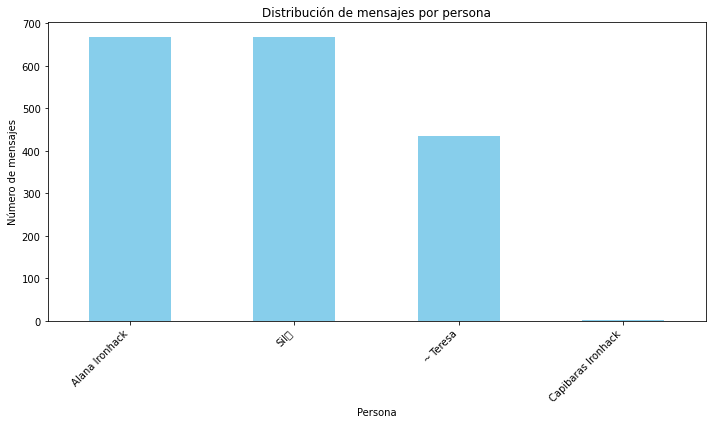

In [11]:
# Contar los mensajes por persona
conteo_mensajes = df['Persona'].value_counts()

# Visualizar la distribución
plt.figure(figsize=(10, 6))
conteo_mensajes.plot(kind='bar', color='skyblue')
plt.title('Distribución de mensajes por persona')
plt.xlabel('Persona')
plt.ylabel('Número de mensajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


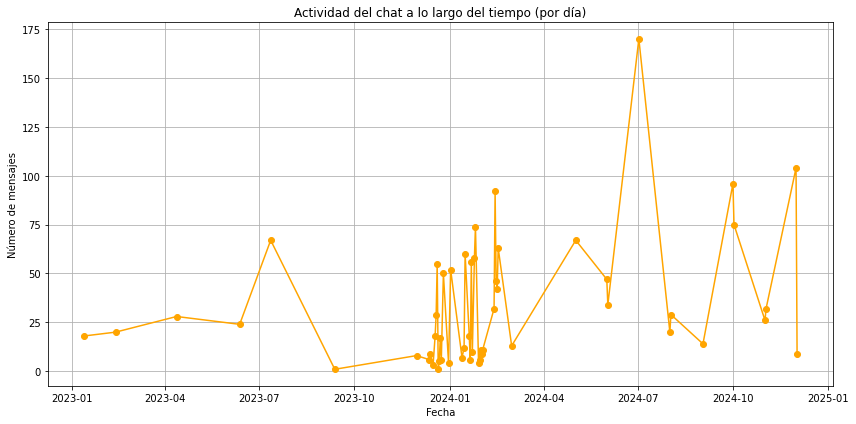

In [12]:
df['Fecha'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'])

# Agrupar los mensajes por día y contar el número de mensajes en cada día
actividad_diaria = df.groupby(df['Fecha'].dt.date).size()

# Visualizar la actividad del chat a lo largo del tiempo
plt.figure(figsize=(12, 6))
actividad_diaria.plot(marker='o', color='orange')
plt.title('Actividad del chat a lo largo del tiempo (por día)')
plt.xlabel('Fecha')
plt.ylabel('Número de mensajes')
plt.grid(True)
plt.tight_layout()
plt.show()

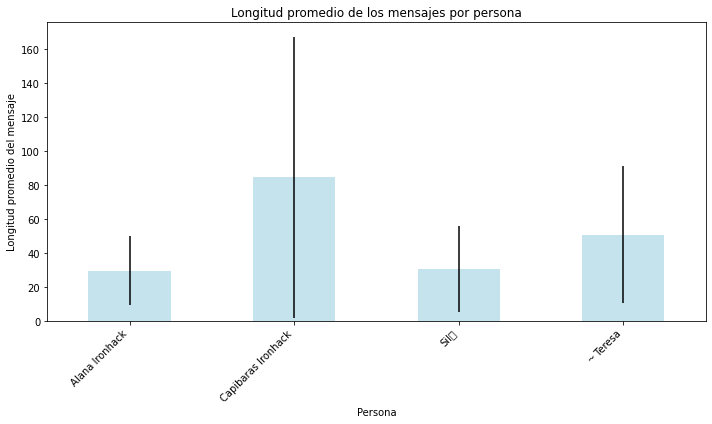

In [13]:
# Calcular la longitud de cada mensaje
df['Longitud del mensaje'] = df['Mensaje'].apply(len)

# Agrupar los mensajes por persona y calcular estadísticas sobre la longitud de los mensajes
estadisticas_longitud = df.groupby('Persona')['Longitud del mensaje'].describe()

# Visualizar la distribución de la longitud de los mensajes por persona
plt.figure(figsize=(10, 6))
estadisticas_longitud['mean'].plot(kind='bar', color='lightblue', alpha=0.7, yerr=estadisticas_longitud['std'])
plt.title('Longitud promedio de los mensajes por persona')
plt.xlabel('Persona')
plt.ylabel('Longitud promedio del mensaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

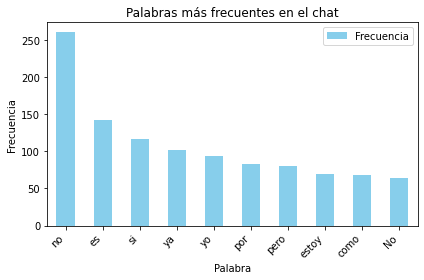

In [14]:
# Concatenar todos los mensajes en un solo texto
todos_los_mensajes = ' '.join(df['Mensaje'])

# Dividir el texto en palabras individuales
palabras = todos_los_mensajes.split()

# Contar la frecuencia de cada palabra
conteo_palabras = Counter(palabras)

# Palabras irrelevantes que quieres eliminar del análisis (opcional)
palabras_irrelevantes = ['el', 'la', 'los', 'las', 'de', 'que', 'a', 'y', 'en', 'con', 'Yo', 'me',
                         'mí', 'conmigo', 'Nosotros', 'nos', 'nosotras', 'Tú', 'te', 'ti', 'contigo',
                         'usted', 'vos', 'Vosotros', 'vosotras', 'os', 'ustedes', 'Él', 'lo', 'le', 
                         'se', 'sí', 'consigo', 'ella', 'la', 'ello', 'lo', 'Ellos', 'ellas', 'los',
                         'las', 'les', 'se', 'un', 'una']

# Eliminar palabras irrelevantes del conteo
for palabra in palabras_irrelevantes:
    del conteo_palabras[palabra]

# Obtener las palabras más frecuentes y su frecuencia de aparición
palabras_mas_frecuentes = conteo_palabras.most_common(10)

# Visualizar las palabras más frecuentes
plt.figure(figsize=(10, 6))
palabras_df = pd.DataFrame(palabras_mas_frecuentes, columns=['Palabra', 'Frecuencia'])
palabras_df.plot(kind='bar', x='Palabra', y='Frecuencia', color='skyblue')
plt.title('Palabras más frecuentes en el chat')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ANALISIS DE SENTIMIENTOS

In [25]:
df = pd.DataFrame(df, columns=["Fecha", 'Hora', 'Persona', 'Mensaje'])
df['Fecha'] = pd.to_datetime(df['Fecha'])

data = df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Mensaje"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Mensaje"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Mensaje"]]
print(data.head())

       Fecha      Hora             Persona  \
0 2023-11-30  19:12:50  Capibaras Ironhack   
1 2023-11-30  19:12:50      Alana Ironhack   
2 2023-11-30  19:12:50  Capibaras Ironhack   
3 2023-11-30  19:12:56      Alana Ironhack   
4 2023-11-30  19:13:12      Alana Ironhack   

                                             Mensaje  Positive  Negative  \
0  ‎Los mensajes y las llamadas están cifrados de...       0.0       0.0   
1  ‎Alana Ironhack creó el grupo “Capibaras Ironh...       0.0       0.0   
2                         ‎Alana Ironhack te añadió.       0.0       0.0   
3                                         Holiiii!!!       0.0       0.0   
4  Les paso las fotos de ayer prepárense xq es un...       0.0       0.0   

   Neutral  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  


In [26]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
